In [1]:
# import packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

2023-10-14 02:31:18.530080: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# load mnist data
(train_img, train_label), (test_img, test_label) = mnist.load_data()

In [3]:
# find shape of images
train_img_shape = train_img.shape
train_label_shape = train_label.shape
test_img_shape = test_img.shape
test_label_shape = test_label.shape

print(f'train image shape = {train_img_shape}')
print(f'test image shape = {test_img_shape}')
print(f'train label shape = {train_label_shape}')
print(f'test label shape = {test_label_shape}')

train image shape = (60000, 28, 28)
test image shape = (10000, 28, 28)
train label shape = (60000,)
test label shape = (10000,)


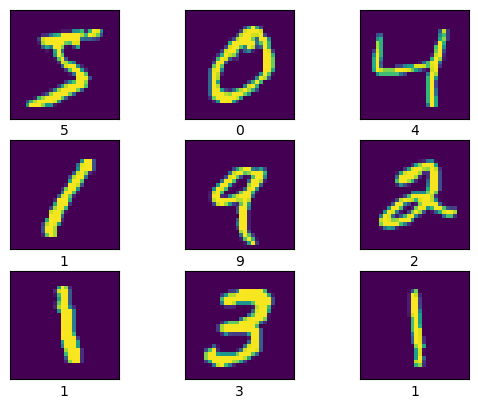

In [4]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_img[i])
    plt.xlabel(train_label[i])

In [5]:
# reshape this data
# normalize the data
train_img = train_img.reshape(-1, 28*28).astype("float32")/255.0
test_img = test_img.reshape(-1, 28*28).astype("float32")/255.0

In [6]:
print(f'train image shape = {train_img_shape}')
print(f'test image shape = {test_img_shape}')
print(f'data type= {train_img.dtype}')

train image shape = (60000, 28, 28)
test image shape = (10000, 28, 28)
data type= float32


In [7]:
#  create model

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='relu'),
])

2023-10-14 02:31:28.416590: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# compile model

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [9]:
# fit model

model.fit(train_img, train_label,batch_size=32, epochs=5, verbose=2)

Epoch 1/5
1875/1875 - 12s - loss: 0.7865 - accuracy: 0.6964 - 12s/epoch - 6ms/step
Epoch 2/5
1875/1875 - 13s - loss: 0.3197 - accuracy: 0.8778 - 13s/epoch - 7ms/step
Epoch 3/5
1875/1875 - 11s - loss: 0.2657 - accuracy: 0.8945 - 11s/epoch - 6ms/step
Epoch 4/5
1875/1875 - 12s - loss: 0.2500 - accuracy: 0.8984 - 12s/epoch - 6ms/step
Epoch 5/5
1875/1875 - 12s - loss: 0.0578 - accuracy: 0.9805 - 12s/epoch - 6ms/step


In [10]:
model.evaluate(test_img, test_label, batch_size=32, verbose=2)

313/313 - 2s - loss: 0.0715 - accuracy: 0.9799 - 2s/epoch - 8ms/step


[0.07150323688983917, 0.9799000024795532]

In [11]:
model.save('models/sequential_mnist.model')

INFO:tensorflow:Assets written to: models/sequential_mnist.model/assets
